## importando bibliotecas

In [2]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np


from os import listdir, path, makedirs
from os.path import isfile, join

from sklearn.metrics import accuracy_score

import shutil

## Separando em treinamento e teste 

In [3]:
faces_caminho = "imagens/cropped_faces/"
lista_arq_faces = [f for f in listdir(faces_caminho) if isfile(join(faces_caminho, f))]

In [4]:
len(lista_arq_faces)

750

In [5]:
face_path_treino = "imagens/treino/"
face_path_teste = "imagens/teste/"

if not path.exists(face_path_treino):
    makedirs(face_path_treino)

if not path.exists(face_path_teste):
    makedirs(face_path_teste)


for arq in lista_arq_faces:
    sujeito = arq[1:3]
    numero = arq[4:6]

    if int(numero) <= 10:
        shutil.copyfile(faces_caminho + arq, face_path_treino + arq)

    else:
        shutil.copyfile(faces_caminho + arq, face_path_teste + arq)

## Tratando as imagens

In [1]:
def padroniza_imagem(imagem_caminho):
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    imagem = cv2.resize(imagem, (200, 200), interpolation=cv2.INTER_LANCZOS4)

    return imagem

In [6]:
lista_faces_treino = [f for f in listdir(face_path_treino) if isfile(join(face_path_treino, f))]
lista_faces_teste = [f for f in listdir(face_path_teste) if isfile(join(face_path_teste, f))]

In [7]:
dados_treinamento, sujeitos_treinamento = [], []

In [8]:
for i, arq in enumerate(lista_faces_treino):
    
    imagem_path = face_path_treino + arq
    imagem = padroniza_imagem(imagem_path)
    dados_treinamento.append(imagem)
    sujeito = arq[1:3]
    sujeitos_treinamento.append(int(sujeito))

In [9]:
len(dados_treinamento)

500

In [9]:
dados_testes, sujeitos_teste = [], []

In [10]:
for i, arq in enumerate(lista_faces_teste):
    
    imagem_path = face_path_teste + arq
    imagem = padroniza_imagem(imagem_path)
    dados_testes.append(imagem)
    sujeito = arq[1:3]
    sujeitos_teste.append(int(sujeito))

In [12]:
len(sujeitos_teste)

250

## Classificador Eingenfaces

In [12]:
# antes de usar o algoritmo, converter para 32 bits
sujeitos_treinamento = np.asarray(sujeitos_treinamento, dtype=np.int32)
sujeitos_teste = np.asarray(sujeitos_teste, dtype=np.int32)

In [13]:
modelo_eingenfaces = cv2.face.EigenFaceRecognizer_create()

In [14]:
modelo_eingenfaces.train(dados_treinamento, sujeitos_treinamento)

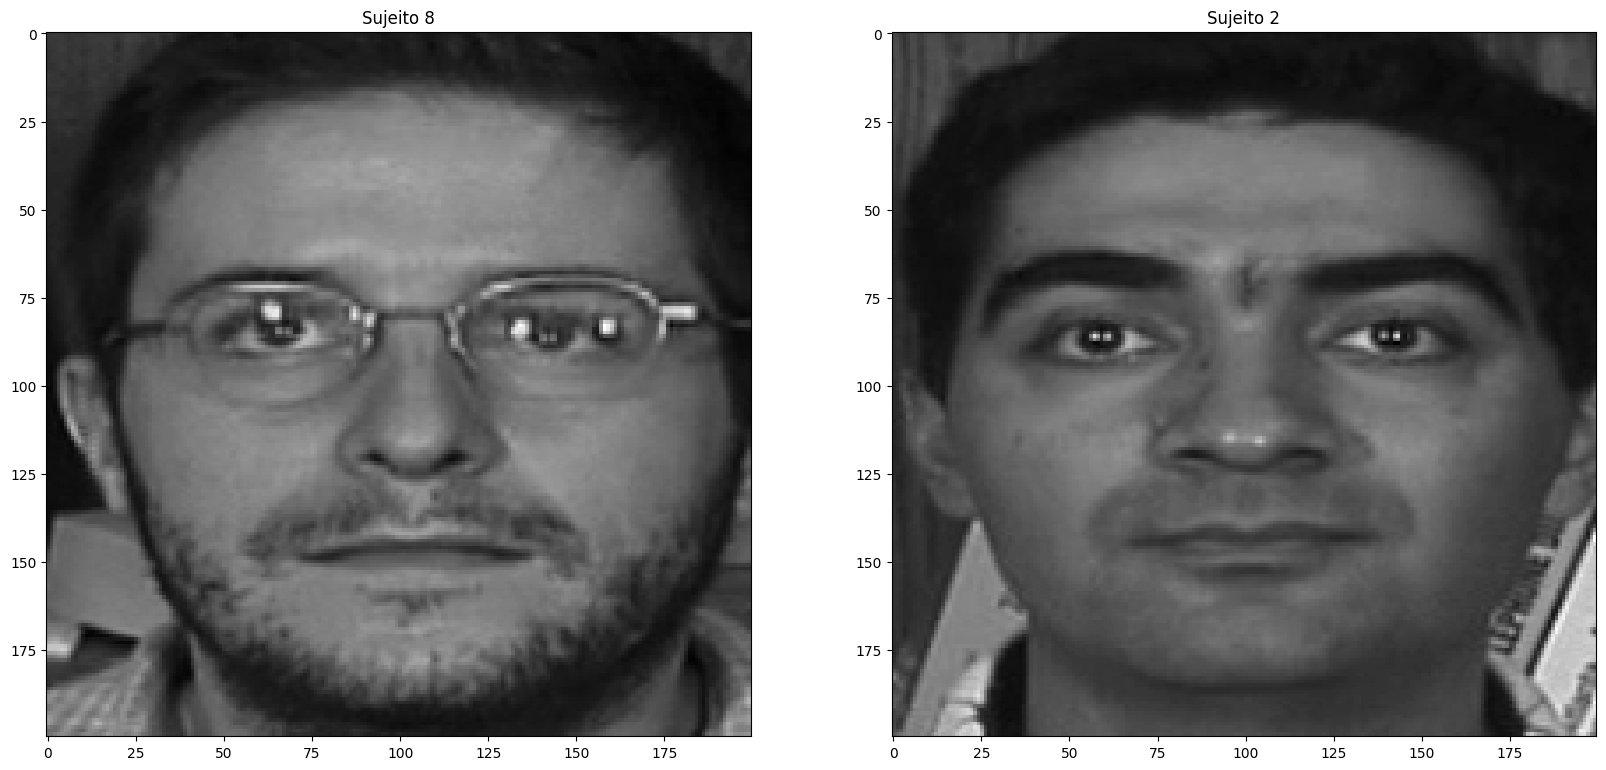

In [40]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title(f"Sujeito {str(sujeitos_teste[35])}")
plt.imshow(dados_testes[35], cmap="gray")

plt.subplot(122)
plt.title(f"Sujeito {str(sujeitos_teste[7])}")
plt.imshow(dados_testes[7], cmap="gray")

plt.show()


In [15]:
predicao = modelo_eingenfaces.predict(dados_testes[37])
predicao

(8, 4226.083647362752)

## Algoritmo Fisherfaces

In [16]:
modelo_fisherfaces = cv2.face.FisherFaceRecognizer_create()

In [17]:
modelo_fisherfaces.train(dados_treinamento, sujeitos_treinamento)

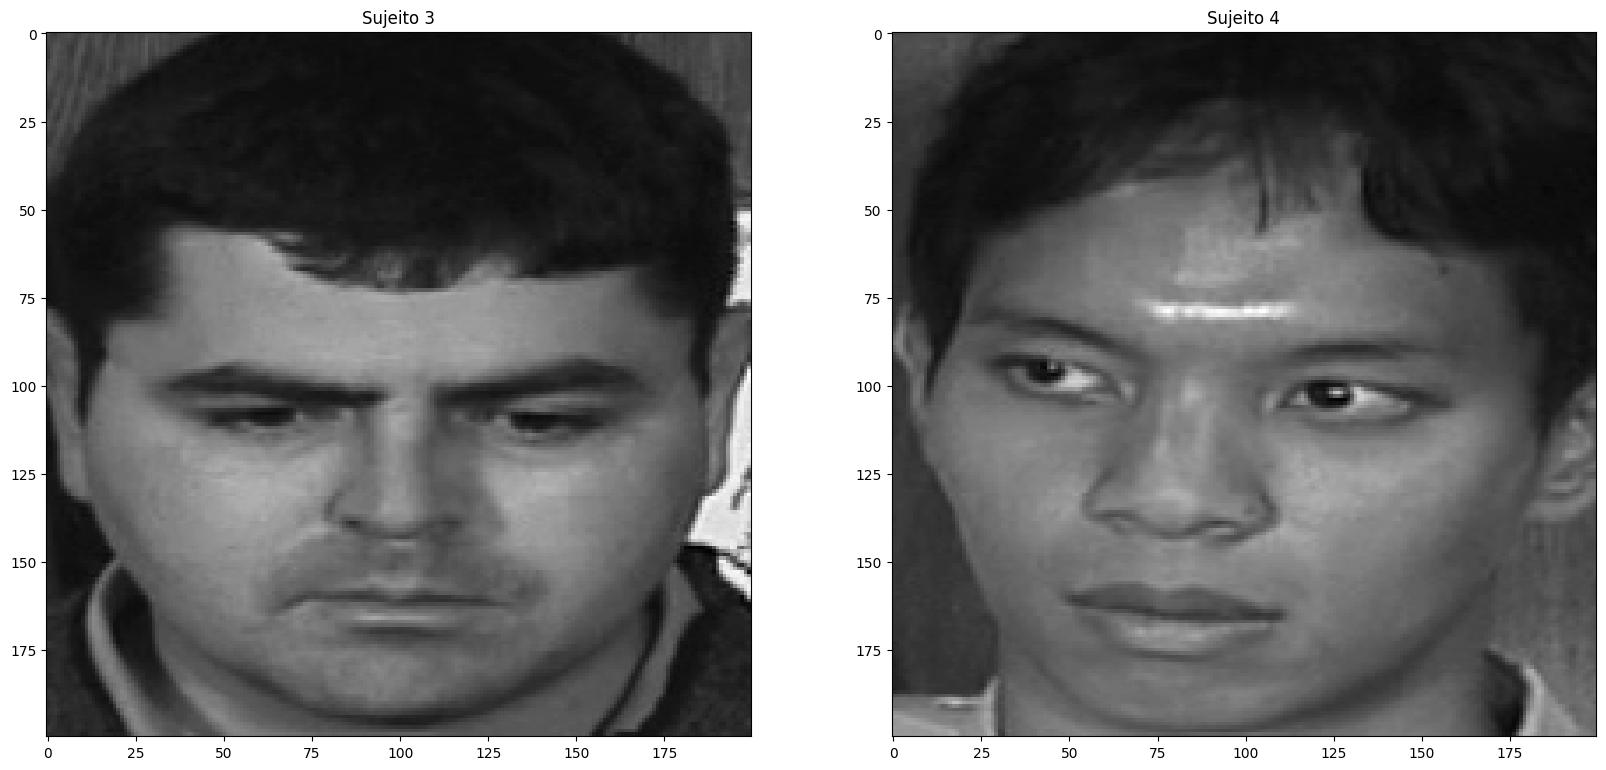

In [18]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title(f"Sujeito {str(sujeitos_teste[13])}")
plt.imshow(dados_testes[13], cmap="gray")

plt.subplot(122)
plt.title(f"Sujeito {str(sujeitos_teste[19])}")
plt.imshow(dados_testes[19], cmap="gray")

plt.show()

In [19]:
predicao = modelo_fisherfaces.predict(dados_testes[13])
predicao

(3, 891.0556911562242)

## Classificador LBPH

In [23]:
modelo_lbph = cv2.face.LBPHFaceRecognizer_create()

In [24]:
modelo_lbph.train(dados_treinamento, sujeitos_treinamento)

## Precisão dos algoritmos

In [25]:
# acuracia do eingenfaces
y_predicoes_eingenfaces = []

In [26]:
for item in dados_testes:
    y_predicoes_eingenfaces.append(modelo_eingenfaces.predict(item)[0])

In [27]:
acuracia_eingenfaces = accuracy_score(sujeitos_teste, y_predicoes_eingenfaces)

In [28]:
acuracia_eingenfaces

0.724

In [29]:
y_predicoes_fisherfaces = []

In [32]:
for item in dados_testes:
    y_predicoes_fisherfaces.append(modelo_fisherfaces.predict(item)[0])

In [33]:
acuracia_fisherfaces = accuracy_score(sujeitos_teste, y_predicoes_fisherfaces)

In [34]:
acuracia_fisherfaces

0.52

In [38]:
y_predicoes_lpbh = []

for item in dados_testes:
    y_predicoes_lpbh.append(modelo_lbph.predict(item)[0])


acuracia_lpbh = accuracy_score(sujeitos_teste, y_predicoes_lpbh)

In [39]:
acuracia_lpbh

0.792